In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install scienceplots
import scienceplots as sp
!pip install seaborn
import seaborn as sb
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

In [74]:
data = pd.read_csv('C:\\Users\\ragin\\Downloads\\Diabetes.csv')

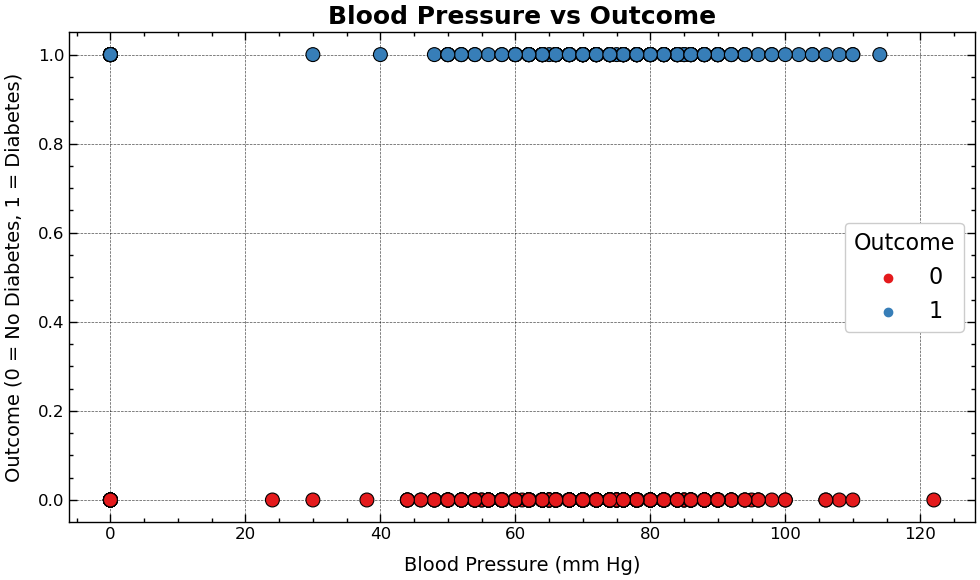

In [75]:
# Set a science plot style for a better look
plt.style.use(['science', 'notebook', 'grid'])

# Create the scatter plot with different colors for each outcome
plt.figure(figsize=(10, 6))
sb.scatterplot(x='BloodPressure', y='Outcome', data=data, hue='Outcome', palette='Set1', s=100, edgecolor='black')

# Add title and labels with better fonts and sizes
plt.title('Blood Pressure vs Outcome', fontsize=18, fontweight='bold')
plt.xlabel('Blood Pressure (mm Hg)', fontsize=14, labelpad=10)
plt.ylabel('Outcome (0 = No Diabetes, 1 = Diabetes)', fontsize=14, labelpad=10)

# Improve ticks and aesthetics
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Custom grid style

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [76]:
X = data[['BloodPressure']].values  # Features as rows
y = data['Outcome'].values.reshape(-1, 1)  # Outcome as column vector

In [77]:
m = X.shape[0]  # Number of examples
n = X.shape[1]  # Number of features

In [78]:
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

In [79]:
def vectorised_cost_function(X, y, w, b):
    # Forward propagation
    z = np.dot(X, w) + b
    a = sigmoid_function(z)
    
    # Compute the cost function
    cost = -(1/m) * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
    
    return cost, a


C:\Users\ragin\AppData\Local\Temp\ipykernel_22012\2008060826.py:7: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
C:\Users\ragin\AppData\Local\Temp\ipykernel_22012\2008060826.py:7: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m) * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))


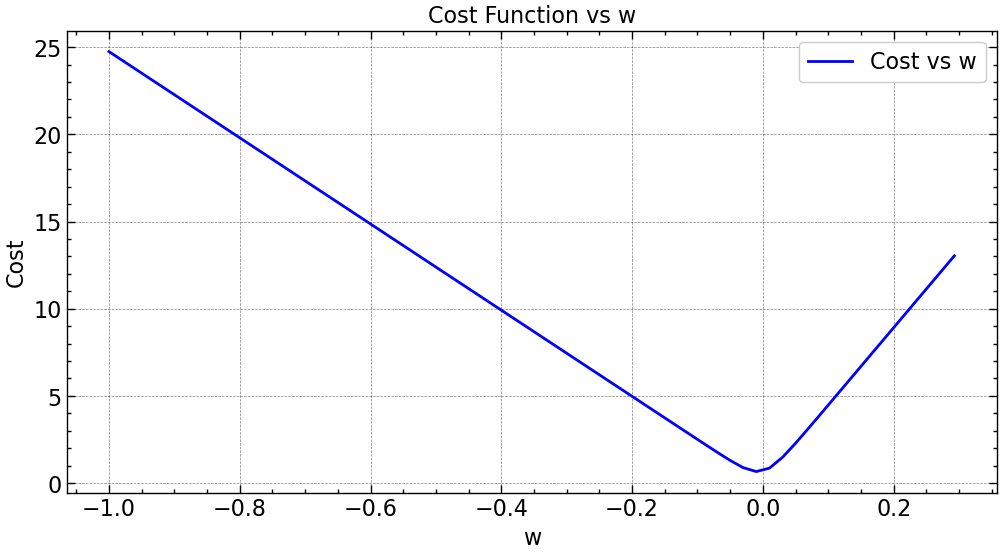

In [80]:
w_range = np.linspace(-1, 1, 100)
b_fixed = 0  # Fixed value for b

cost_values_w = np.zeros(w_range.shape)

# Compute the cost for each value of w
for i in range(w_range.shape[0]):
    w = w_range[i]
    cost, _ = vectorised_cost_function(X, y, np.array([[w]]), b_fixed)
    cost_values_w[i] = cost

# Plot w vs cost
plt.figure(figsize=(12, 6))
plt.plot(w_range, cost_values_w, label='Cost vs w', color='blue')
plt.xlabel('w')
plt.ylabel('Cost')
plt.title('Cost Function vs w')
plt.grid(True)
plt.legend()
plt.show()

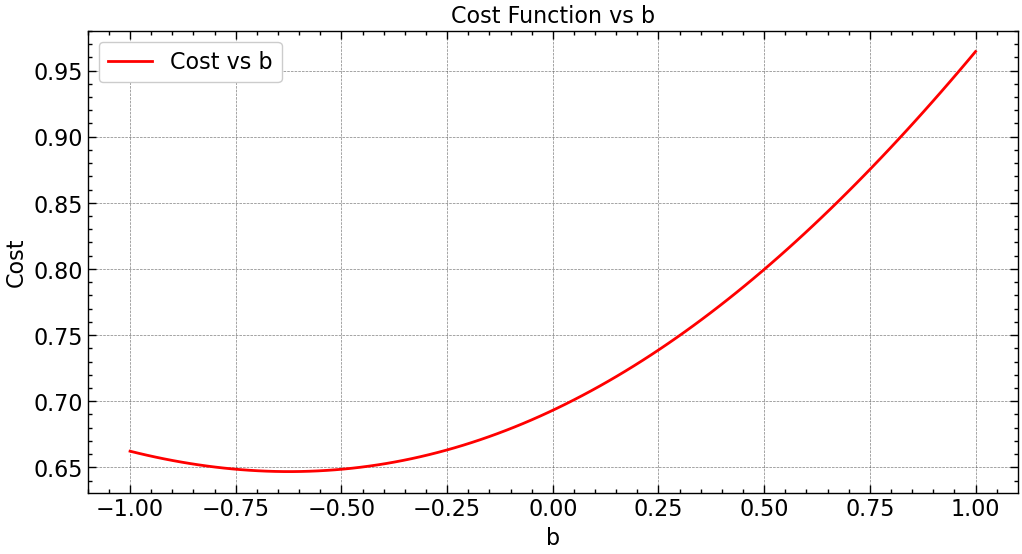

In [81]:
# Define a range of values for b and w
b_range = np.linspace(-1, 1, 100)
w_fixed = 0  # Fixed value for w

cost_values_b = np.zeros(b_range.shape)

# Compute the cost for each value of b
for i in range(b_range.shape[0]):
    b = b_range[i]
    cost, _ = vectorised_cost_function(X, y, np.array([[w_fixed]]), b)
    cost_values_b[i] = cost

# Plot b vs cost
plt.figure(figsize=(12, 6))
plt.plot(b_range, cost_values_b, label='Cost vs b', color='red')
plt.xlabel('b')
plt.ylabel('Cost')
plt.title('Cost Function vs b')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\ragin\AppData\Local\Temp\ipykernel_22012\2008060826.py:7: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
C:\Users\ragin\AppData\Local\Temp\ipykernel_22012\2008060826.py:7: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m) * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
C:\Users\ragin\anaconda3\Lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


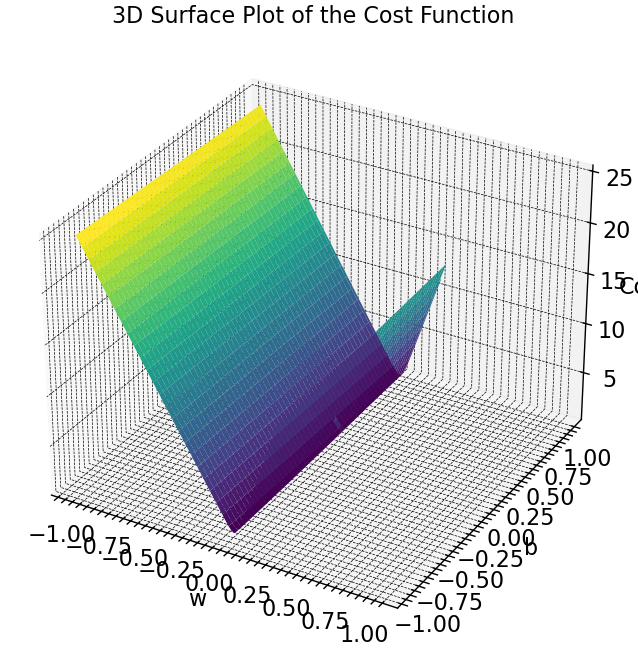

In [82]:
# Define a range of values for w and b
w_range = np.linspace(-1, 1, 100)
b_range = np.linspace(-1, 1, 100)

W, B = np.meshgrid(w_range, b_range)
cost_values = np.zeros(W.shape)

# Compute the cost for each combination of w and b
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        w = W[i, j]
        b = B[i, j]
        cost, _ = vectorised_cost_function(X, y, np.array([[w]]), b)
        cost_values[i, j] = cost

# Plot w vs b vs cost
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, cost_values, cmap='viridis', edgecolor='none')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
ax.set_title('3D Surface Plot of the Cost Function')
plt.show()


In [83]:
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = X.shape[0]
    costs = []
    w_history = []
    b_history = []
    
    for _ in range(num_iterations):
        # Forward propagation
        z = np.dot(X, w) + b
        a = sigmoid_function(z)
        
        # Compute cost using the vectorised_cost_function
        cost, _ = vectorised_cost_function(X, y, w, b)
        costs.append(cost)
        
        # Compute gradients
        dw = (1/m) * np.dot(X.T, (a - y))
        db = (1/m) * np.sum(a - y)
        
        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record history
        w_history.append(w[0, 0])
        b_history.append(b)
    
    return w, b, w_history, b_history, costs


In [84]:
# Function to plot cost vs iterations
def plot_cost_vs_iterations(cost_history, iterations):
    plt.figure(figsize=(8, 6))
    plt.plot(range(iterations), cost_history, label='Cost', color='b')
    plt.title("Cost vs Iterations", fontsize=16)
    plt.xlabel("Iterations", fontsize=14)
    plt.ylabel("Cost", fontsize=14)
    plt.grid(True)
    plt.show()


In [85]:
def gradient_descent(X, y, a, w, b, learning_rate):
    # Gradient Descent
    dw = (1/m) * np.dot(X.T, (a - y))
    db = (1/m) * np.sum(a - y)
    
    # Update parameters
    w = w - learning_rate * dw
    b = b - learning_rate * db
    
    return w, b


In [86]:
def logistic_regression(X, y, w, b, learning_rate, iterations):
    cost_list = []
    
    for i in range(iterations):
        cost, a = vectorised_cost_function(X, y, w, b)
        
        w, b = gradient_descent(X, y, a, w, b, learning_rate)
        
        cost_list.append(cost)
        
        # Print cost every (iterations / 10)
        if i % (iterations // 10) == 0:
            print(f"Cost after {i} iterations: {cost}")
            
    return w, b, cost_list


In [87]:
def plot_logistic_regression_line(X, y, w, b):
    # Plot the scatter plot of the data
    plt.figure(figsize=(10, 6))
    sb.scatterplot(x=X.flatten(), y=y.flatten(), hue=y.flatten(), palette='Set1', s=100, edgecolor='black')

    # Create a range of values for the x-axis
    x_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

    # Use the computed weights and bias to plot the logistic regression line
    # Here, we use the final sigmoid function but only for visualization
    z_values = np.dot(x_values, w) + b
    a_values = 1 / (1 + np.exp(-z_values))  # This is the sigmoid function for the line

    # Plot the logistic regression line
    plt.plot(x_values, a_values, color='black', linewidth=2, label='Logistic Regression Line')

    # Add title and labels with better fonts and sizes
    plt.title('Blood Pressure vs Outcome with Logistic Regression Line', fontsize=18, fontweight='bold')
    plt.xlabel('Blood Pressure (mm Hg)', fontsize=14, labelpad=10)
    plt.ylabel('Outcome (0 = No Diabetes, 1 = Diabetes)', fontsize=14, labelpad=10)

    # Improve ticks and aesthetics
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)  # Custom grid style

    plt.legend()
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()



Cost after 0 iterations: 0.6931471805599452
Cost after 10000 iterations: 0.650861192859583
Cost after 20000 iterations: 0.6484166046238362
Cost after 30000 iterations: 0.6469533402159839
Cost after 40000 iterations: 0.6460668152779114
Cost after 50000 iterations: 0.6455235062041762
Cost after 60000 iterations: 0.6451871696340297
Cost after 70000 iterations: 0.6449771861269558
Cost after 80000 iterations: 0.6448451666356001
Cost after 90000 iterations: 0.6447616881992064


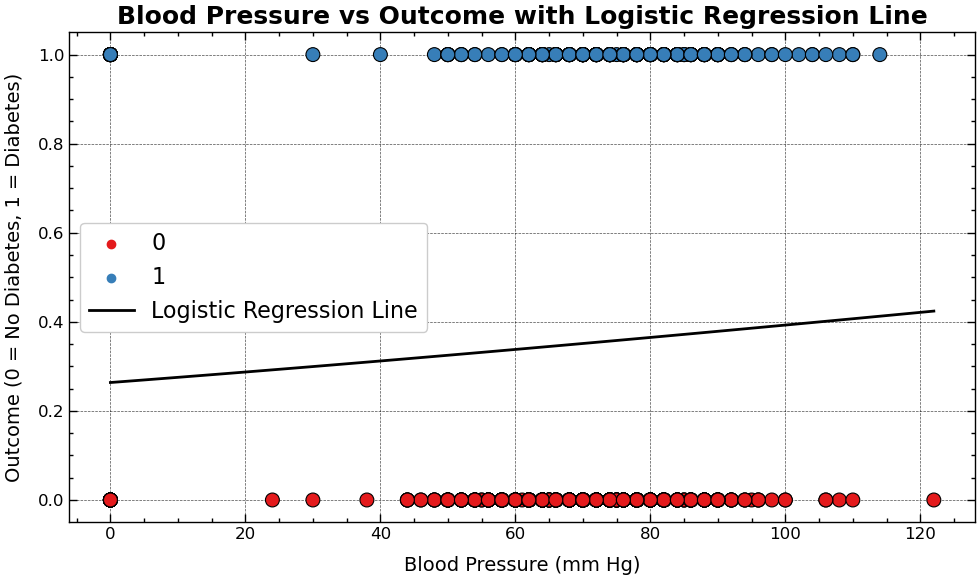

In [88]:
# Initialize parameters
w = np.zeros((n, 1))
b = 0
iterations = 100000
learning_rate = 0.0015

# Call the logistic regression model
w, b, cost_list = logistic_regression(X, y, w, b, learning_rate, iterations)

# Plot the logistic regression line using the final parameters
plot_logistic_regression_line(X, y, w, b)
